# Consolidate the DNAbc and RNAbc Bulk Library Analyses

**Author:** Michelle Franc Ragsac (mragsac@eng.ucsd.edu)

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt
import seaborn as sns

---

## Import Previously-Processed Information

### Import the Barcode-Enhancer Dictionary Summary

In [2]:
# Import the dictionary information containing SN identifiers
df_dict = pd.read_csv('../MR_Notochord-Library-Spreadsheets_720bc-SN130-Dictionary-Summary.csv')
df_dict.columns = ['SN_Number','Enhancer','Number_of_Barcodes','Type_of_Match','hasAdapter','hasError','Notes']

# Generate a dictionary to quickly lookup the SN identifier associated with each enhancer
enhancer2identifier = df_dict[['SN_Number','Enhancer']].set_index('Enhancer').to_dict()['SN_Number']

### Import the DNAbc and RNAbc Bulk Library Raw Counts

In [3]:
colnames = ['Barcode','Total_Raw_Counts','Enhancer']

dna_rep1 = pd.read_csv('filtered-inputs/SN720_DNAbc_Rep_1_S4_L003_R1_001_collapsed_filtered-collapsed.txt',sep='\t',usecols=colnames)
dna_rep2 = pd.read_csv('filtered-inputs/SN720_DNAbc_Rep_2_S5_L003_R1_001_collapsed_filtered-collapsed.txt',sep='\t',usecols=colnames)
dna_rep3 = pd.read_csv('filtered-inputs/SN720_DNAbc_Rep_3_S6_L003_R1_001_collapsed_filtered-collapsed.txt',sep='\t',usecols=colnames)

rna_rep1 = pd.read_csv('filtered-inputs/SN720_RNAbc_Rep_1_S1_L008_R1_001_collapsed_filtered-collapsed.txt',sep='\t',usecols=colnames)
rna_rep2 = pd.read_csv('filtered-inputs/SN720_RNAbc_Rep_2_S2_L008_R1_001_collapsed_filtered-collapsed.txt',sep='\t',usecols=colnames)
rna_rep3 = pd.read_csv('filtered-inputs/SN720_RNAbc_Rep_3_S3_L008_R1_001_collapsed_filtered-collapsed.txt',sep='\t',usecols=colnames)

### Attach Library and Replicate Information to the DNAbc and RNAbc Bulk Analysis Information

In [4]:
dna_rep1['Library'] = ['DNAbc Bulk'] * dna_rep1.shape[0]
dna_rep2['Library'] = ['DNAbc Bulk'] * dna_rep2.shape[0]
dna_rep3['Library'] = ['DNAbc Bulk'] * dna_rep3.shape[0]

rna_rep1['Library'] = ['RNAbc Bulk'] * rna_rep1.shape[0]
rna_rep2['Library'] = ['RNAbc Bulk'] * rna_rep2.shape[0]
rna_rep3['Library'] = ['RNAbc Bulk'] * rna_rep3.shape[0]

In [5]:
dna_rep1['Replicate'] = ['Replicate 1'] * dna_rep1.shape[0]
dna_rep2['Replicate'] = ['Replicate 2'] * dna_rep2.shape[0]
dna_rep3['Replicate'] = ['Replicate 3'] * dna_rep3.shape[0]

rna_rep1['Replicate'] = ['Replicate 1'] * rna_rep1.shape[0]
rna_rep2['Replicate'] = ['Replicate 2'] * rna_rep2.shape[0]
rna_rep3['Replicate'] = ['Replicate 3'] * rna_rep3.shape[0]

### Attach SN Identifier Information to the DNAbc and RNAbc Bulk Analysis Information

In [6]:
with pd.option_context('mode.chained_assignment', None):
    dna_rep1['SN_Identifier'] = dna_rep1.apply(lambda r: enhancer2identifier[r['Enhancer']], axis=1)
    dna_rep2['SN_Identifier'] = dna_rep2.apply(lambda r: enhancer2identifier[r['Enhancer']], axis=1)
    dna_rep3['SN_Identifier'] = dna_rep3.apply(lambda r: enhancer2identifier[r['Enhancer']], axis=1)
    
    rna_rep1['SN_Identifier'] = rna_rep1.apply(lambda r: enhancer2identifier[r['Enhancer']], axis=1)
    rna_rep2['SN_Identifier'] = rna_rep2.apply(lambda r: enhancer2identifier[r['Enhancer']], axis=1)
    rna_rep3['SN_Identifier'] = rna_rep3.apply(lambda r: enhancer2identifier[r['Enhancer']], axis=1)

### Preview the Data

As all of the data should be in the same format, we will just be previewing one of the tables!

In [7]:
dna_rep1.head() 

,Barcode,Total_Raw_Counts,Enhancer,Library,Replicate,SN_Identifier
0,AAAAAAAAAAAATAGGTGGACATTTTTAAT,662,CTTTGATCCAGGCGAGGACTTTTGCTTCTCGACTGCGGGGAATTCC...,DNAbc Bulk,Replicate 1,SN47
1,AAAAAAAAAAAGTGACTCACAAACAAGTAT,733,CTTCGTCTGATCCAGCAACGAAAGCGATCTGACTGCGGTCCTATCC...,DNAbc Bulk,Replicate 1,SN64
2,AAAAAAAAAAATAGGTGGACATTTTTAAT,46,CTTTGATCCAGGCGAGGACTTTTGCTTCTCGACTGCGGGGAATTCC...,DNAbc Bulk,Replicate 1,SN47
3,AAAAAAAAATAACTGGCAAAGAGGAAAATG,1806,CCAACTATCCGATCCGATATCCGGAAAGAGCCCGCTGTGATTGGCT...,DNAbc Bulk,Replicate 1,SN29
4,AAAAAAAGAACAATAAATCATCTATCGGAG,1057,CTTCTTTACACAGAAGATGGTTTAGACTTCACTGCGGAACGAACCG...,DNAbc Bulk,Replicate 1,SN57


---

## Compare Enhancers & Barcodes Between DNAbc and RNAbc Bulk Library Replicates

### Visualize Overlapping Enhancer Barcode Tags & Enhancer Identifiers Across Replicates

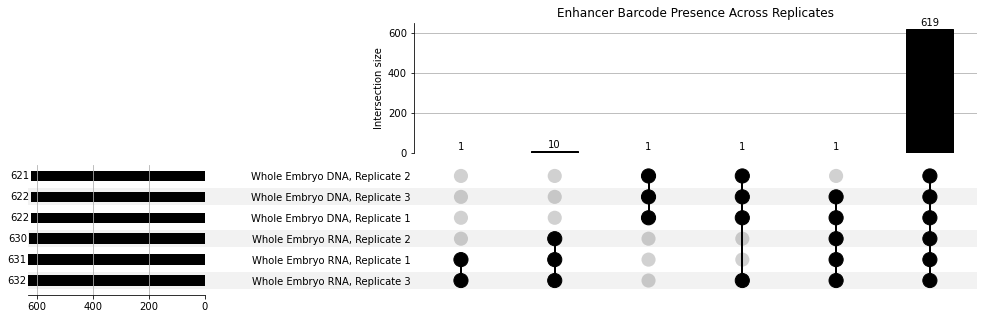

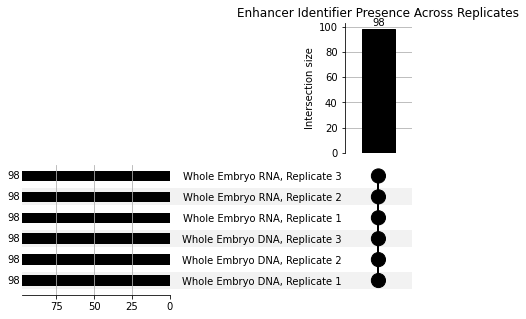

In [8]:
# Evaluate the dataset to see the barcodes that appear across all three replicates in both libraries
replicate_barcodes = from_contents({'Whole Embryo DNA, Replicate 1': dna_rep1['Barcode'].unique(), 
                                    'Whole Embryo DNA, Replicate 2': dna_rep2['Barcode'].unique(), 
                                    'Whole Embryo DNA, Replicate 3': dna_rep3['Barcode'].unique(),
                                    'Whole Embryo RNA, Replicate 1': rna_rep1['Barcode'].unique(),
                                    'Whole Embryo RNA, Replicate 2': rna_rep2['Barcode'].unique(),
                                    'Whole Embryo RNA, Replicate 3': rna_rep3['Barcode'].unique()})

# Evaluate the dataset to also see the enhancers that appear across all three replicates
replicate_enhancers = from_contents({'Whole Embryo DNA, Replicate 1': dna_rep1['SN_Identifier'].unique(), 
                                     'Whole Embryo DNA, Replicate 2': dna_rep2['SN_Identifier'].unique(), 
                                     'Whole Embryo DNA, Replicate 3': dna_rep3['SN_Identifier'].unique(),
                                     'Whole Embryo RNA, Replicate 1': rna_rep1['SN_Identifier'].unique(),
                                     'Whole Embryo RNA, Replicate 2': rna_rep2['SN_Identifier'].unique(),
                                     'Whole Embryo RNA, Replicate 3': rna_rep3['SN_Identifier'].unique()})

fig = plt.figure(figsize=(17,5))
UpSet(replicate_barcodes, subset_size='count', show_counts=True, element_size=None).plot(fig=fig);
plt.title('Enhancer Barcode Presence Across Replicates');
plt.savefig('01_MR_SN-720bc_Data-Normalization-DNAbc-RNAbc_shared-barcodes-upsetplot.svg')

fig = plt.figure(figsize=(7,5))
UpSet(replicate_enhancers, subset_size='count', show_counts=True, element_size=None).plot(fig=fig);
plt.title('Enhancer Identifier Presence Across Replicates');
plt.savefig('01_MR_SN-720bc_Data-Normalization-DNAbc-RNAbc_shared-enhancers-upsetplot.svg')

### Combine All Data into a Single `DataFrame`

In [9]:
df = pd.concat([dna_rep1, dna_rep2, dna_rep3,
                rna_rep1, rna_rep2, rna_rep3])

---

## Conduct Filtering of the DNAbc and RNAbc Bulk Library Data based on Raw Read Counts

### Filter DNAbc and RNAbc Bulk Libraries by Barcodes

We will filter our library by the barcodes that are present across all three libraries.

In [10]:
# Gather the barcode identities and SN identifiers that are present across all the libraries and replicates
shared_barcodes = replicate_barcodes.sort_index().loc[True,True,True]['id'].values
shared_enhancers = replicate_enhancers.sort_index().loc[True,True,True,True,True,True]['id'].values

print("There are",len(shared_barcodes),"barcodes in common across the datasets")
print("There are",len(shared_enhancers),"enhancers in common across the datasets")

df_filt = df.loc[(df['Barcode'].isin(shared_barcodes)) & (df['SN_Identifier'].isin(shared_enhancers))]

There are 621 barcodes in common across the datasets
There are 98 enhancers in common across the datasets


In [11]:
shared_barcodes = replicate_barcodes.sort_index().loc[True,True,True]['id'].values
shared_enhancers = replicate_enhancers.sort_index().loc[True,True,True,True,True,True]['id'].values

print("There are",len(shared_barcodes),"barcodes in common across the datasets")
print("There are",len(shared_enhancers),"enhancers in common across the datasets")

df_filt = df.loc[(df['Barcode'].isin(shared_barcodes)) & (df['SN_Identifier'].isin(shared_enhancers))]

There are 621 barcodes in common across the datasets
There are 98 enhancers in common across the datasets


In [12]:
# Compare the original raw counts with the updated raw counts
original_raw_Counts = pd.DataFrame({'DNAbc Library':[df.loc[(df['Library'] == "DNAbc Bulk") & (df['Replicate'] == "Replicate 1")]['Total_Raw_Counts'].sum(),
                                                     df.loc[(df['Library'] == "DNAbc Bulk") & (df['Replicate'] == "Replicate 2")]['Total_Raw_Counts'].sum(),
                                                     df.loc[(df['Library'] == "DNAbc Bulk") & (df['Replicate'] == "Replicate 3")]['Total_Raw_Counts'].sum()], 
                                    'RNAbc Library':[df.loc[(df['Library'] == "RNAbc Bulk") & (df['Replicate'] == "Replicate 1")]['Total_Raw_Counts'].sum(),
                                                     df.loc[(df['Library'] == "RNAbc Bulk") & (df['Replicate'] == "Replicate 2")]['Total_Raw_Counts'].sum(),
                                                     df.loc[(df['Library'] == "RNAbc Bulk") & (df['Replicate'] == "Replicate 3")]['Total_Raw_Counts'].sum()]}, 
                                   index=['Replicate 1','Replicate 3','Replicate 3'])

new_raw_Counts = pd.DataFrame({'DNAbc Library':[df_filt.loc[(df_filt['Library'] == "DNAbc Bulk") & (df_filt['Replicate'] == "Replicate 1")]['Total_Raw_Counts'].sum(),
                                                df_filt.loc[(df_filt['Library'] == "DNAbc Bulk") & (df_filt['Replicate'] == "Replicate 2")]['Total_Raw_Counts'].sum(),
                                                df_filt.loc[(df_filt['Library'] == "DNAbc Bulk") & (df_filt['Replicate'] == "Replicate 3")]['Total_Raw_Counts'].sum()], 
                               'RNAbc Library':[df_filt.loc[(df_filt['Library'] == "RNAbc Bulk") & (df_filt['Replicate'] == "Replicate 1")]['Total_Raw_Counts'].sum(),
                                                df_filt.loc[(df_filt['Library'] == "RNAbc Bulk") & (df_filt['Replicate'] == "Replicate 2")]['Total_Raw_Counts'].sum(),
                                                df_filt.loc[(df_filt['Library'] == "RNAbc Bulk") & (df_filt['Replicate'] == "Replicate 3")]['Total_Raw_Counts'].sum()]}, 
                              index=['Replicate 1','Replicate 3','Replicate 3'])

print("Percent Change Between Original Total Read Counts vs. Total Read Counts")
print("**         After filtering for N=619 Concordant Barcodes             **")
print("=======================================================================")
print((new_raw_Counts - original_raw_Counts) / original_raw_Counts * 100)
print("")

Percent Change Between Original Total Read Counts vs. Total Read Counts
**         After filtering for N=619 Concordant Barcodes             **
             DNAbc Library  RNAbc Library
Replicate 1      -0.003920      -0.394883
Replicate 3       0.000000      -0.452318
Replicate 3      -0.004252      -0.446547



In [13]:
# Compare the original total number of sequences with the updated total number of sequences
original_total_sequences = pd.DataFrame(
    {'DNAbc Library':[df.loc[(df['Library'] == "DNAbc Bulk") & (df['Replicate'] == "Replicate 1")]['SN_Identifier'].nunique(),
                      df.loc[(df['Library'] == "DNAbc Bulk") & (df['Replicate'] == "Replicate 2")]['SN_Identifier'].nunique(),
                      df.loc[(df['Library'] == "DNAbc Bulk") & (df['Replicate'] == "Replicate 3")]['SN_Identifier'].nunique()], 
     'RNAbc Library':[df.loc[(df['Library'] == "RNAbc Bulk") & (df['Replicate'] == "Replicate 1")]['SN_Identifier'].nunique(),
                      df.loc[(df['Library'] == "RNAbc Bulk") & (df['Replicate'] == "Replicate 2")]['SN_Identifier'].nunique(),
                      df.loc[(df['Library'] == "RNAbc Bulk") & (df['Replicate'] == "Replicate 3")]['SN_Identifier'].nunique()]}, 
    index=['Replicate 1','Replicate 3','Replicate 3'])

new_total_sequences = pd.DataFrame(
    {'DNAbc Library':[df_filt.loc[(df_filt['Library'] == "DNAbc Bulk") & (df_filt['Replicate'] == "Replicate 1")]['SN_Identifier'].nunique(),
                      df_filt.loc[(df_filt['Library'] == "DNAbc Bulk") & (df_filt['Replicate'] == "Replicate 2")]['SN_Identifier'].nunique(),
                      df_filt.loc[(df_filt['Library'] == "DNAbc Bulk") & (df_filt['Replicate'] == "Replicate 3")]['SN_Identifier'].nunique()], 
     'RNAbc Library':[df_filt.loc[(df_filt['Library'] == "RNAbc Bulk") & (df_filt['Replicate'] == "Replicate 1")]['SN_Identifier'].nunique(),
                      df_filt.loc[(df_filt['Library'] == "RNAbc Bulk") & (df_filt['Replicate'] == "Replicate 2")]['SN_Identifier'].nunique(),
                      df_filt.loc[(df_filt['Library'] == "RNAbc Bulk") & (df_filt['Replicate'] == "Replicate 3")]['SN_Identifier'].nunique()]}, 
    index=['Replicate 1','Replicate 3','Replicate 3'])

print("Change Between Original Number of Enhancers vs. Number of Sequences")
print("**        After filtering for N=619 Concordant Barcodes          **")
print("===================================================================")
print(new_total_sequences - original_total_sequences)
print("")

Change Between Original Number of Enhancers vs. Number of Sequences
**        After filtering for N=619 Concordant Barcodes          **
             DNAbc Library  RNAbc Library
Replicate 1              0              0
Replicate 3              0              0
Replicate 3              0              0



---

## Visualize the Variability in Barcode Tag Read Counts Across Enhancers

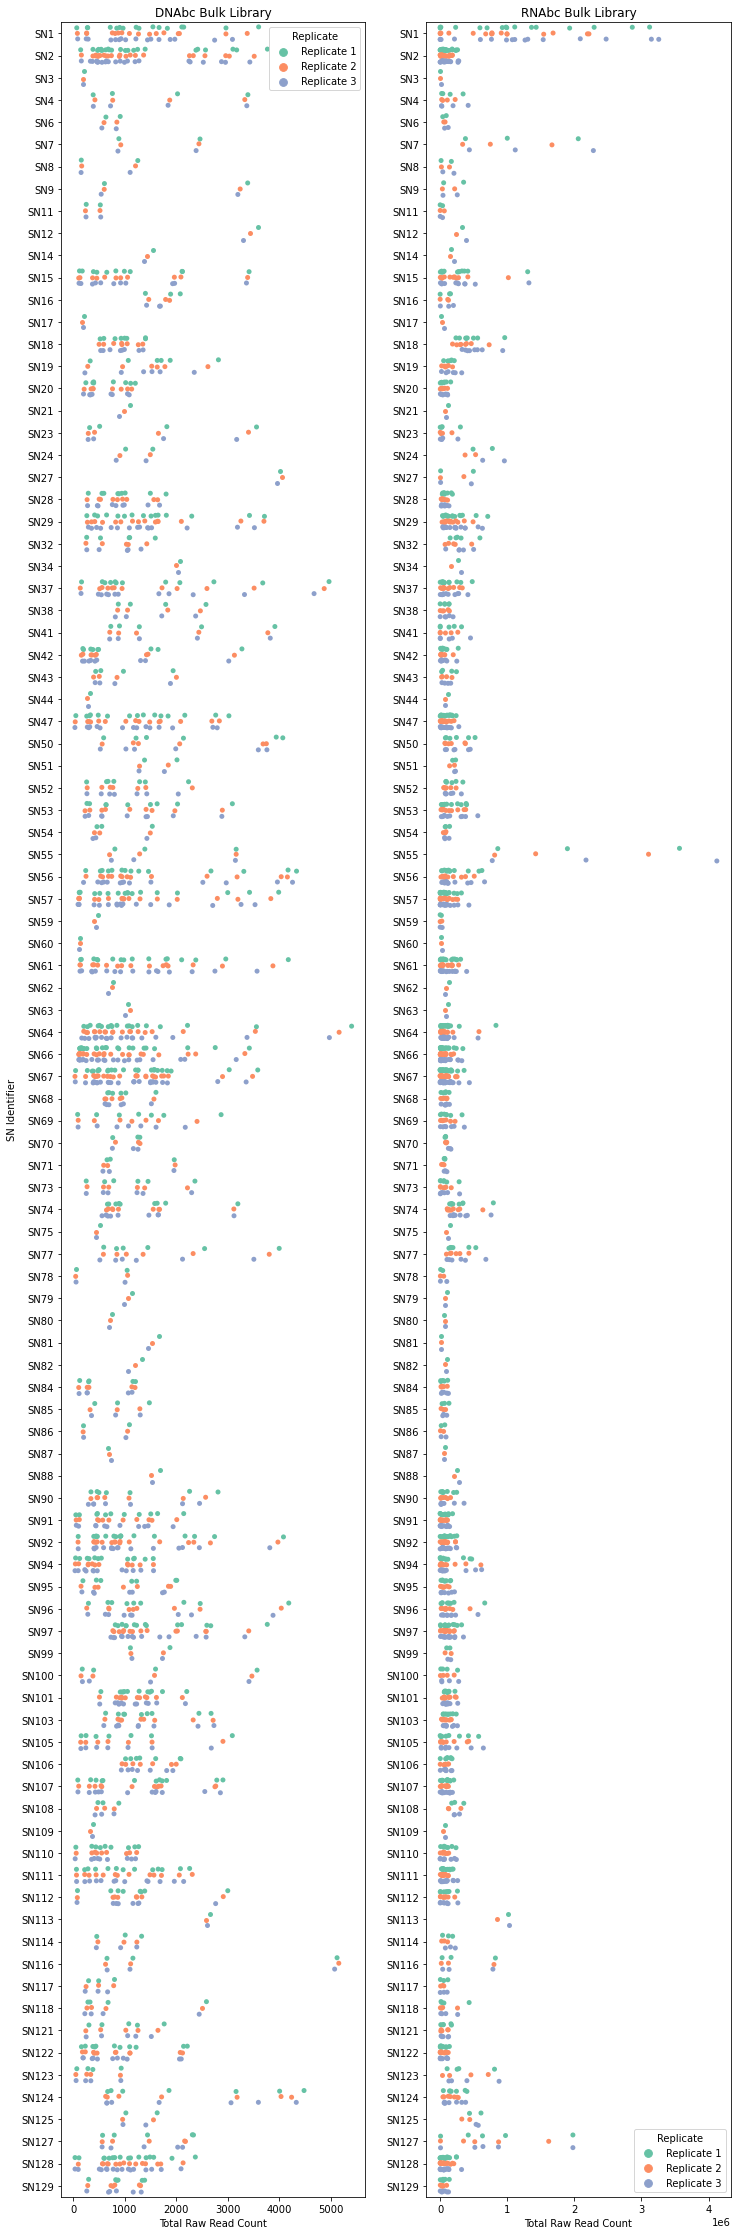

In [14]:
plt.figure(figsize=(12,40));

##### * ##### * ##### * ##### * ##### 
# DNAbc Bulk Library
##### * ##### * ##### * ##### * ##### 
plt.subplot(121);
sns.stripplot(data=df.loc[df['Library'] == 'DNAbc Bulk'], y='SN_Identifier', x='Total_Raw_Counts', hue='Replicate',
              order=sorted(df['SN_Identifier'].unique(),key=lambda x: int(x[2:])), dodge=True, palette='Set2')
plt.title('DNAbc Bulk Library');
plt.xlabel('Total Raw Read Count');
plt.ylabel('SN Identifier');

##### * ##### * ##### * ##### * ##### 
# RNAbc Bulk Library
##### * ##### * ##### * ##### * ##### 
plt.subplot(122);
sns.stripplot(data=df.loc[df['Library'] == 'RNAbc Bulk'], y='SN_Identifier', x='Total_Raw_Counts', hue='Replicate',
              order=sorted(df['SN_Identifier'].unique(),key=lambda x: int(x[2:])), dodge=True, palette='Set2')
plt.title('RNAbc Bulk Library');
plt.xlabel('Total Raw Read Count');
plt.ylabel(None);

---

## Evaluate the Correlation Between Replicates for DNA and RNA

### Correlation Between Barcodes

In [15]:
# Gather the barcodes that are in common across all three replicates of the DNA 
DNA_barcodes = df_filt.loc[df_filt['Library'].str.contains('DNA')].groupby('Replicate')['Barcode'].unique()
DNA_barcodes = (set(DNA_barcodes['Replicate 1']) & set(DNA_barcodes['Replicate 2'])) & set(DNA_barcodes['Replicate 3'])

# Gather the barcodes that are in common across all three replicates of the RNA
RNA_barcodes = df_filt.loc[df_filt['Library'].str.contains('RNA')].groupby('Replicate')['Barcode'].unique()
RNA_barcodes = (set(RNA_barcodes['Replicate 1']) & set(RNA_barcodes['Replicate 2'])) & set(RNA_barcodes['Replicate 3'])

# Gather the barcodes that are present in the DICTIONARY
filename = '../../02_enhancer-dictionary/04_assemble/'
DICT_barcodes = pd.read_csv(filename + "outputs/02_MR_SN-720bc_Comparing-Dictionary-to-SN130_bc-enhancer-associations.tsv",sep="\t")
DICT_barcodes = set([i for e in [l.split(",") for l in DICT_barcodes['Associated_Barcodes']] for i in e])

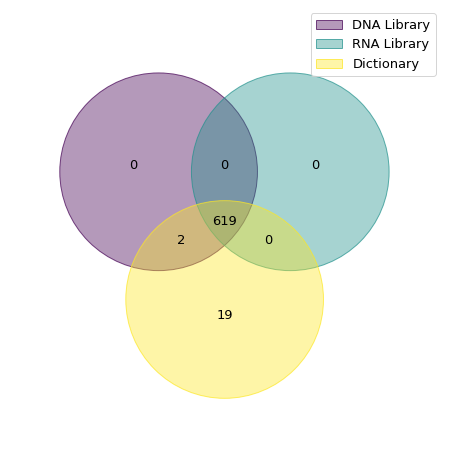

In [16]:
from venn import venn
%matplotlib inline

musicians = {
    "DNA Library": DNA_barcodes,
    "RNA Library": RNA_barcodes,
    "Dictionary":  DICT_barcodes
}

venn(musicians)
plt.savefig('barcodes-in-common.svg')

### Correlation Between Counts

In [17]:
DNA_counts = pd.pivot(pd.DataFrame(df_filt.loc[df_filt['Library'].str.contains('DNA')].groupby(
    ['Replicate','SN_Identifier'])['Total_Raw_Counts'].mean()).reset_index(),
                      index='SN_Identifier',columns='Replicate')['Total_Raw_Counts']
RNA_counts = pd.pivot(pd.DataFrame(df_filt.loc[df_filt['Library'].str.contains('RNA')].groupby(
    ['Replicate','SN_Identifier'])['Total_Raw_Counts'].mean()).reset_index(),
                      index='SN_Identifier',columns='Replicate')['Total_Raw_Counts']

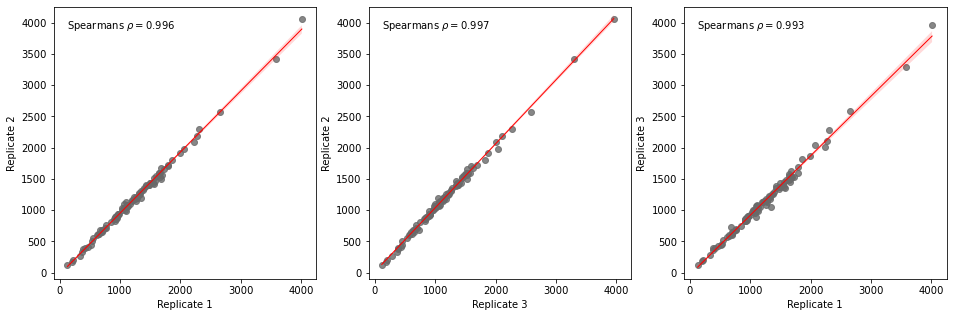

In [18]:
from scipy.stats import pearsonr, spearmanr

plt.figure(figsize=(16,5))

ax1 = plt.subplot(131);
g1 = sns.regplot(data=DNA_counts, x="Replicate 1", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"red", "lw":1.})
spearman_r,spearman_p = spearmanr(DNA_counts["Replicate 1"],DNA_counts["Replicate 2"])
g1.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g1.transAxes)
plt.xlim(-100,4250);
plt.ylim(-100,4250);

ax2 = plt.subplot(132);
g2 = sns.regplot(data=DNA_counts, x="Replicate 3", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"red", "lw":1.})
spearman_r,spearman_p = spearmanr(DNA_counts["Replicate 3"],DNA_counts["Replicate 2"])
g2.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g2.transAxes)
plt.xlim(-100,4250);
plt.ylim(-100,4250);

ax3 = plt.subplot(133);
g3 = sns.regplot(data=DNA_counts, x="Replicate 1", y="Replicate 3", scatter_kws={"color":"dimgrey"}, line_kws={"color":"red", "lw":1.})
spearman_r,spearman_p = spearmanr(DNA_counts["Replicate 1"],DNA_counts["Replicate 3"])
g3.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g3.transAxes)
plt.xlim(-100,4250);
plt.ylim(-100,4250);

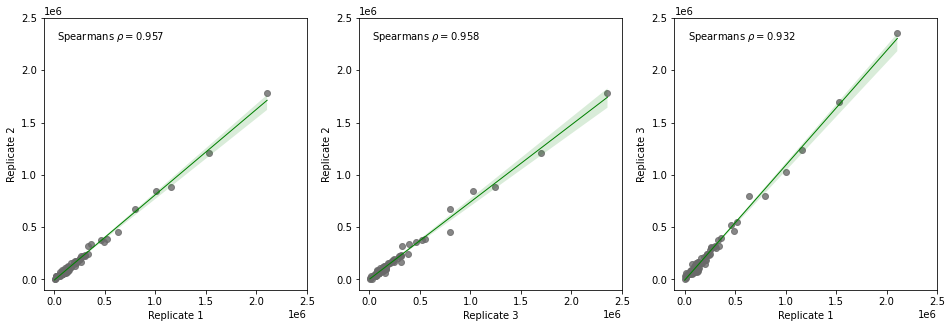

In [19]:
from scipy.stats import pearsonr, spearmanr

plt.figure(figsize=(16,5))

ax1 = plt.subplot(131);
g1 = sns.regplot(data=RNA_counts, x="Replicate 1", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"green", "lw":1.})
spearman_r,spearman_p = spearmanr(RNA_counts["Replicate 1"],RNA_counts["Replicate 2"])
g1.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g1.transAxes)
plt.xlim(-100000,2500000);
plt.ylim(-100000,2500000);

ax2 = plt.subplot(132);
g2 = sns.regplot(data=RNA_counts, x="Replicate 3", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"green", "lw":1.})
spearman_r,spearman_p = spearmanr(RNA_counts["Replicate 3"],RNA_counts["Replicate 2"])
g2.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g2.transAxes)
plt.xlim(-100000,2500000);
plt.ylim(-100000,2500000);

ax3 = plt.subplot(133);
g3 = sns.regplot(data=RNA_counts, x="Replicate 1", y="Replicate 3", scatter_kws={"color":"dimgrey"}, line_kws={"color":"green", "lw":1.})
spearman_r,spearman_p = spearmanr(RNA_counts["Replicate 1"],RNA_counts["Replicate 3"])
g3.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g3.transAxes)
plt.xlim(-100000,2500000);
plt.ylim(-100000,2500000);

---

## Normalize the DNAbc and RNAbc Bulk Analyses Values

### Calculate RPM Values for the DNAbc and RNAbc Replicates

In [20]:
df_pivot = pd.pivot_table(df_filt, index=['SN_Identifier','Barcode'], columns=['Library','Replicate'], values='Total_Raw_Counts')

# Determine the numerator and denominator values for calculating RPM 
# --> RPM = ( Read Count * 1,000,000 ) / (Total Read Counts in Sample)
df_pivot_numerator = df_pivot * 1000000
df_pivot_denominator = df_pivot.sum()

# Calculate RPM values for the entire dataset for each barcode
df_pivot['DNAbc Bulk','Replicate 1'] = df_pivot_numerator['DNAbc Bulk','Replicate 1'] / df_pivot_denominator.loc['DNAbc Bulk', 'Replicate 1']
df_pivot['DNAbc Bulk','Replicate 2'] = df_pivot_numerator['DNAbc Bulk','Replicate 2'] / df_pivot_denominator.loc['DNAbc Bulk', 'Replicate 2']
df_pivot['DNAbc Bulk','Replicate 3'] = df_pivot_numerator['DNAbc Bulk','Replicate 3'] / df_pivot_denominator.loc['DNAbc Bulk', 'Replicate 3']
df_pivot['RNAbc Bulk','Replicate 1'] = df_pivot_numerator['RNAbc Bulk','Replicate 1'] / df_pivot_denominator.loc['RNAbc Bulk', 'Replicate 1']
df_pivot['RNAbc Bulk','Replicate 2'] = df_pivot_numerator['RNAbc Bulk','Replicate 2'] / df_pivot_denominator.loc['RNAbc Bulk', 'Replicate 2']
df_pivot['RNAbc Bulk','Replicate 3'] = df_pivot_numerator['RNAbc Bulk','Replicate 3'] / df_pivot_denominator.loc['RNAbc Bulk', 'Replicate 3']

### Calculate the Expression Per Enhancer by Consolidating Barcode Tag RPM Values

In [21]:
# log2( mean(RNA_i) / mean(DNA_i) ) where i represents an enhancer
df_pivot_log = np.log2(df_pivot.groupby(level=0).mean()['RNAbc Bulk'] / 
                       df_pivot.groupby(level=0).mean()['DNAbc Bulk'])

df_pivot_log.head() # preview the dataframe

Replicate,Replicate 1,Replicate 2,Replicate 3
SN_Identifier,,,
SN1,2.512466,2.468973,2.557383
SN100,-1.015589,-0.856846,-0.941394
SN101,-0.730670,-0.392154,-0.850708
SN103,-0.803249,-0.872758,-0.899969
SN105,0.546532,0.540741,0.580591


### Visualize the Distribution of log2(RNA/DNA) Values Across Replicates

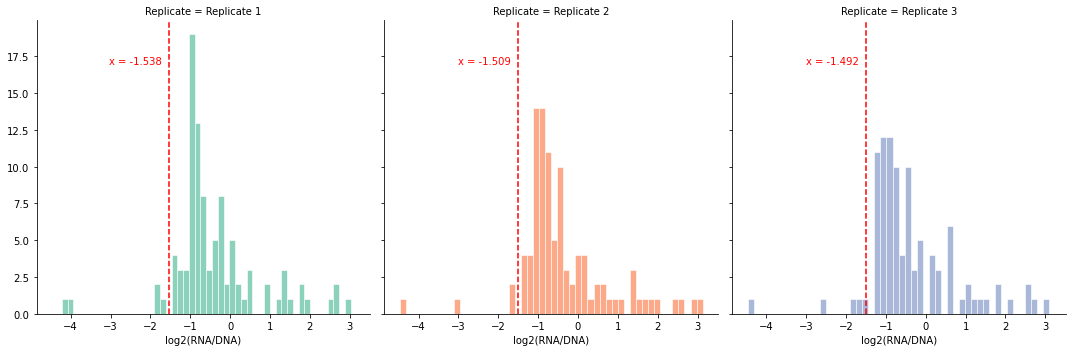

In [22]:
df_pivot_log_long = pd.melt(df_pivot_log, ignore_index=False, value_name='log2(RNA/DNA)').reset_index()
lower_bound = df_pivot_log.mean() - df_pivot_log.std() 

g = sns.FacetGrid(df_pivot_log_long, col="Replicate", hue="Replicate", palette='Set2', height=5, aspect=1)
g.map(sns.histplot, "log2(RNA/DNA)", edgecolor='white', bins=50);

for ax,bound in zip(g.axes[0],lower_bound):
    ax.axvline(bound, color='r', ls='--')
    ax.text(bound-1.5, ax.get_ylim()[1]*0.85, f'x = {round(bound,3)}', color='r')

---

In [23]:
DNA_counts = df_pivot['DNAbc Bulk'].reset_index().groupby('SN_Identifier')[['Replicate 1','Replicate 2','Replicate 3']].mean()
RNA_counts = df_pivot['RNAbc Bulk'].reset_index().groupby('SN_Identifier')[['Replicate 1','Replicate 2','Replicate 3']].mean()

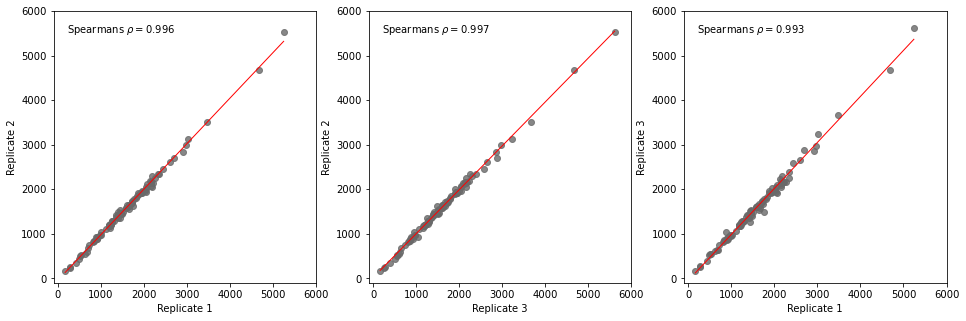

In [24]:
plt.figure(figsize=(16,5))

ax1 = plt.subplot(131);
g1 = sns.regplot(data=DNA_counts, x="Replicate 1", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"red", "lw":1.},ci=False)
spearman_r,spearman_p = spearmanr(DNA_counts["Replicate 1"],DNA_counts["Replicate 2"])
g1.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g1.transAxes)
plt.xlim(-100,6000);
plt.ylim(-100,6000);

ax2 = plt.subplot(132);
g2 = sns.regplot(data=DNA_counts, x="Replicate 3", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"red", "lw":1.},ci=False)
spearman_r,spearman_p = spearmanr(DNA_counts["Replicate 3"],DNA_counts["Replicate 2"])
g2.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g2.transAxes)
plt.xlim(-100,6000);
plt.ylim(-100,6000);

ax3 = plt.subplot(133);
g3 = sns.regplot(data=DNA_counts, x="Replicate 1", y="Replicate 3", scatter_kws={"color":"dimgrey"}, line_kws={"color":"red", "lw":1.},ci=False)
spearman_r,spearman_p = spearmanr(DNA_counts["Replicate 1"],DNA_counts["Replicate 3"])
g3.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g3.transAxes)
plt.xlim(-100,6000);
plt.ylim(-100,6000);

plt.savefig('dna-correlation-rpm.svg')

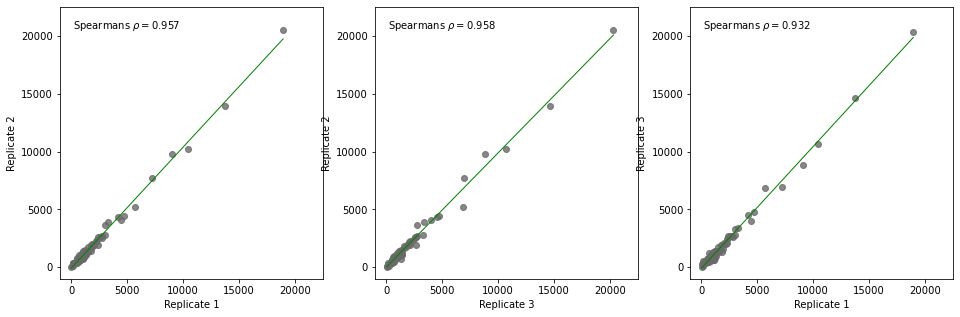

In [25]:
from scipy.stats import pearsonr, spearmanr

plt.figure(figsize=(16,5))

ax1 = plt.subplot(131);
g1 = sns.regplot(data=RNA_counts, x="Replicate 1", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"green", "lw":1.},ci=False)
spearman_r,spearman_p = spearmanr(RNA_counts["Replicate 1"],RNA_counts["Replicate 2"])
g1.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g1.transAxes)
plt.xlim(-1000,22500);
plt.ylim(-1000,22500);

ax2 = plt.subplot(132);
g2 = sns.regplot(data=RNA_counts, x="Replicate 3", y="Replicate 2", scatter_kws={"color":"dimgrey"}, line_kws={"color":"green", "lw":1.},ci=False)
spearman_r,spearman_p = spearmanr(RNA_counts["Replicate 3"],RNA_counts["Replicate 2"])
g2.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g2.transAxes)
plt.xlim(-1000,22500);
plt.ylim(-1000,22500);

ax3 = plt.subplot(133);
g3 = sns.regplot(data=RNA_counts, x="Replicate 1", y="Replicate 3", scatter_kws={"color":"dimgrey"}, line_kws={"color":"green", "lw":1.},ci=False)
spearman_r,spearman_p = spearmanr(RNA_counts["Replicate 1"],RNA_counts["Replicate 3"])
g3.annotate('Spearmans 'r'$\rho=$'+f"{spearman_r:0.3f}", xy=(.05, .92), xycoords=g3.transAxes)
plt.xlim(-1000,22500);
plt.ylim(-1000,22500);

plt.savefig('rna-correlation-rpm.svg')

---

## Conduct Final Filtering on Barcodes with Low log2(RNA/DNA) Values

### Filter According to Lower Bound of log2(RNA/DNA)

In [26]:
filt_low =  df_pivot_log.loc[df_pivot_log['Replicate 1'] < lower_bound.loc['Replicate 1']].index.to_list()
filt_low += df_pivot_log.loc[df_pivot_log['Replicate 2'] < lower_bound.loc['Replicate 2']].index.to_list()
filt_low += df_pivot_log.loc[df_pivot_log['Replicate 3'] < lower_bound.loc['Replicate 3']].index.to_list()

print("The following enhancers are lower than the lower bound on log2(RNA/DNA) expression values:")
print(sorted(set(filt_low),key=lambda x: int(x[2:])))

df_pivot_log_filt = df_pivot_log.loc[[e for e in df_pivot_log.index if e not in filt_low]]

The following enhancers are lower than the lower bound on log2(RNA/DNA) expression values:
['SN3', 'SN11', 'SN23', 'SN59', 'SN71', 'SN78', 'SN81', 'SN122']


### Visualize the Distribution of log2(RNA/DNA) Values Across Enhancers

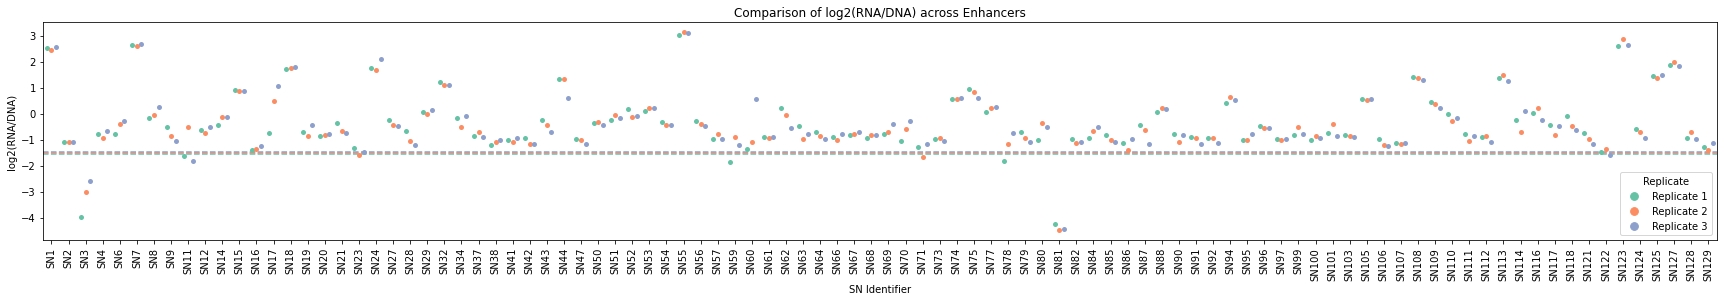

In [27]:
fig = plt.figure(figsize=(30,4));
sns.swarmplot(data=df_pivot_log_long, x='SN_Identifier', y='log2(RNA/DNA)', hue='Replicate',
            order=sorted(df_pivot_log_long['SN_Identifier'].unique(),key=lambda x: int(x[2:])), dodge=True, palette='Set2')

# Plot the lower bounds that we have for replicate 1, 2, and 3 and color the same way as the points
plt.axhline(lower_bound.loc['Replicate 1'], color=sns.color_palette('Set2').as_hex()[0], ls='--')
plt.axhline(lower_bound.loc['Replicate 2'], color=sns.color_palette('Set2').as_hex()[1], ls='--')
plt.axhline(lower_bound.loc['Replicate 3'], color=sns.color_palette('Set2').as_hex()[2], ls='--')

plt.xticks(rotation=90);
plt.xlabel('SN Identifier');
plt.title('Comparison of log2(RNA/DNA) across Enhancers');

### Filter According to the Mean-Variation of Points

In [28]:
quantile = .95
upper_bound = df_pivot_log_filt.std(axis=1).quantile(quantile)

filt_high = df_pivot_log_filt.loc[df_pivot_log_filt.std(axis=1) > upper_bound].index.to_list()
print("The following enhancers are higher than the higher bound on the variation (measured by std) in log2(RNA/DNA) expression values:")
print(sorted(set(filt_high),key=lambda x: int(x[2:])))

df_pivot_log_filt2 = df_pivot_log_filt.loc[[e for e in df_pivot_log_filt.index if e not in filt_high]]

The following enhancers are higher than the higher bound on the variation (measured by std) in log2(RNA/DNA) expression values:
['SN17', 'SN44', 'SN60', 'SN62', 'SN114']


### Visualize the Mean-Variance of log2(RNA/DNA) Values Across Enhancers

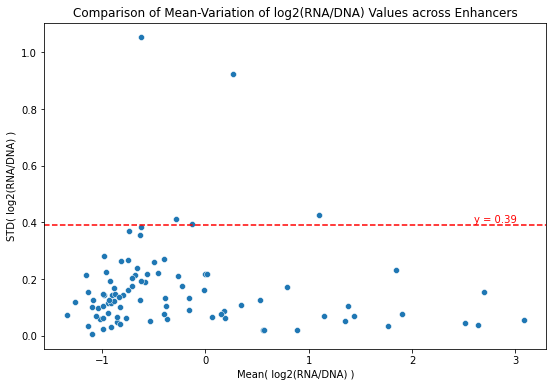

In [29]:
fig = plt.figure(figsize=(9,6));

sns.scatterplot(x=df_pivot_log_filt.mean(axis=1),y=df_pivot_log_filt.std(axis=1));
plt.axhline(upper_bound, color='r', ls='--')
plt.text(2.6, upper_bound+.01, f'y = {round(upper_bound,3)}', color='r')

plt.xlabel('Mean( log2(RNA/DNA) )');
plt.ylabel('STD( log2(RNA/DNA) )');
plt.title('Comparison of Mean-Variation of log2(RNA/DNA) Values across Enhancers');

---

## Generate Enhancer Activity Score Value

In [30]:
with pd.option_context('mode.chained_assignment', None):
    df_pivot_log_filt2['Mean(Replicate 1, Replicate 2, Replicate 3)'] = df_pivot_log_filt2[['Replicate 1','Replicate 2','Replicate 3']].mean(axis=1)

    # The enhancer activity score is the scaled activity value
    min_max_scaler = preprocessing.MinMaxScaler()
    df_pivot_log_filt2['Enhancer Activity Score'] = min_max_scaler.fit_transform(
        np.array(df_pivot_log_filt2['Mean(Replicate 1, Replicate 2, Replicate 3)']).reshape(-1, 1))[:,-1]

df_pivot_log_filt2.head() # preview the results

Replicate,Replicate 1,Replicate 2,Replicate 3,"Mean(Replicate 1, Replicate 2, Replicate 3)",Enhancer Activity Score
SN_Identifier,,,,,
SN1,2.512466,2.468973,2.557383,2.512941,0.871689
SN100,-1.015589,-0.856846,-0.941394,-0.937943,0.090743
SN101,-0.730670,-0.392154,-0.850708,-0.657844,0.154130
SN103,-0.803249,-0.872758,-0.899969,-0.858659,0.108685
SN105,0.546532,0.540741,0.580591,0.555955,0.428817


---

## Export Processed Data

In [31]:
filename = 'outputs/01_MR_SN-720bc_Data-Normalization-DNAbc-RNAbc_'

df.to_csv(filename + 'raw-combined-data.tsv',sep='\t')
df_filt.to_csv(filename + 'raw-combined-data-filtBC-filtE.tsv',sep='\t')
df_pivot.to_csv(filename + 'rpm-values.tsv',sep='\t')
df_pivot_log.to_csv(filename + 'log2-RNA-DNA-values.tsv',sep='\t')
df_pivot_log_filt2.to_csv(filename + 'final-normalization.tsv',sep='\t')

In [32]:
df_pivot_log_filt.to_csv(filename + 'final-normalization-keep-SN44.tsv',sep='\t')
df_pivot_log_filt.shape[0]

90

In [33]:
df_pivot_log_filt

Replicate,Replicate 1,Replicate 2,Replicate 3
SN_Identifier,,,
SN1,2.512466,2.468973,2.557383
SN100,-1.015589,-0.856846,-0.941394
SN101,-0.730670,-0.392154,-0.850708
SN103,-0.803249,-0.872758,-0.899969
SN105,0.546532,0.540741,0.580591
...,...,...,...
SN94,0.404420,0.658953,0.537390
SN95,-0.993746,-1.021760,-0.790910
SN96,-0.474532,-0.557638,-0.565316


In [34]:
dna_rep1_filt_final = dna_rep1.loc[(dna_rep1['SN_Identifier'].isin(df_pivot_log_filt.index)) & 
                                   (dna_rep1['Barcode'].isin(shared_barcodes))]
dna_rep2_filt_final = dna_rep2.loc[(dna_rep2['SN_Identifier'].isin(df_pivot_log_filt.index)) & 
                                   (dna_rep1['Barcode'].isin(shared_barcodes))]
dna_rep3_filt_final = dna_rep3.loc[(dna_rep3['SN_Identifier'].isin(df_pivot_log_filt.index)) & 
                                   (dna_rep1['Barcode'].isin(shared_barcodes))]
rna_rep1_filt_final = rna_rep1.loc[(rna_rep1['SN_Identifier'].isin(df_pivot_log_filt.index)) & 
                                   (dna_rep1['Barcode'].isin(shared_barcodes))]
rna_rep2_filt_final = rna_rep2.loc[(rna_rep2['SN_Identifier'].isin(df_pivot_log_filt.index)) & 
                                   (dna_rep1['Barcode'].isin(shared_barcodes))]
rna_rep3_filt_final = rna_rep3.loc[(rna_rep3['SN_Identifier'].isin(df_pivot_log_filt.index)) & 
                                   (dna_rep1['Barcode'].isin(shared_barcodes))]

In [35]:
print(f"There are {dna_rep1.shape[0]} barcodes in dna_rep1_filt_final")
print(f"There are {dna_rep2.shape[0]} barcodes in dna_rep2_filt_final")
print(f"There are {dna_rep3.shape[0]} barcodes in dna_rep3_filt_final")
print(f"There are {rna_rep1.shape[0]} barcodes in rna_rep1_filt_final")
print(f"There are {rna_rep2.shape[0]} barcodes in rna_rep2_filt_final")
print(f"There are {rna_rep3.shape[0]} barcodes in rna_rep3_filt_final")

There are 622 barcodes in dna_rep1_filt_final
There are 621 barcodes in dna_rep2_filt_final
There are 622 barcodes in dna_rep3_filt_final
There are 631 barcodes in rna_rep1_filt_final
There are 630 barcodes in rna_rep2_filt_final
There are 632 barcodes in rna_rep3_filt_final


In [36]:
print(f"There are {dna_rep1_filt_final.shape[0]} barcodes in dna_rep1_filt_final")
print(f"There are {dna_rep2_filt_final.shape[0]} barcodes in dna_rep2_filt_final")
print(f"There are {dna_rep3_filt_final.shape[0]} barcodes in dna_rep3_filt_final")
print(f"There are {rna_rep1_filt_final.shape[0]} barcodes in rna_rep1_filt_final")
print(f"There are {rna_rep2_filt_final.shape[0]} barcodes in rna_rep2_filt_final")
print(f"There are {rna_rep3_filt_final.shape[0]} barcodes in rna_rep3_filt_final")

There are 596 barcodes in dna_rep1_filt_final
There are 595 barcodes in dna_rep2_filt_final
There are 596 barcodes in dna_rep3_filt_final
There are 595 barcodes in rna_rep1_filt_final
There are 595 barcodes in rna_rep2_filt_final
There are 595 barcodes in rna_rep3_filt_final


In [37]:
dna_rep1_filt_final_nbc = pd.DataFrame(dna_rep1_filt_final.groupby('SN_Identifier')['Barcode'].nunique())
dna_rep2_filt_final_nbc = pd.DataFrame(dna_rep2_filt_final.groupby('SN_Identifier')['Barcode'].nunique())
dna_rep3_filt_final_nbc = pd.DataFrame(dna_rep3_filt_final.groupby('SN_Identifier')['Barcode'].nunique())
rna_rep1_filt_final_nbc = pd.DataFrame(rna_rep1_filt_final.groupby('SN_Identifier')['Barcode'].nunique())
rna_rep2_filt_final_nbc = pd.DataFrame(rna_rep2_filt_final.groupby('SN_Identifier')['Barcode'].nunique())
rna_rep3_filt_final_nbc = pd.DataFrame(rna_rep3_filt_final.groupby('SN_Identifier')['Barcode'].nunique())

In [38]:
temp = pd.merge(dna_rep1_filt_final_nbc,dna_rep2_filt_final_nbc,left_index=True,right_index=True,suffixes=('_DNA_Rep1','_DNA_Rep2'))
temp = pd.merge(temp,dna_rep3_filt_final_nbc,left_index=True,right_index=True)
temp = temp.rename(columns={"Barcode": "Barcode_DNA_Rep3"})

temp = pd.merge(temp,rna_rep1_filt_final_nbc,left_index=True,right_index=True)
temp = temp.rename(columns={"Barcode": "Barcode_RNA_Rep1"})

temp = pd.merge(temp,rna_rep2_filt_final_nbc,left_index=True,right_index=True)
temp = temp.rename(columns={"Barcode": "Barcode_RNA_Rep2"})

temp = pd.merge(temp,rna_rep3_filt_final_nbc,left_index=True,right_index=True)
temp = temp.rename(columns={"Barcode": "Barcode_RNA_Rep3"})

temp.to_csv('/home/mragsac/num-bc-per-enhancer.tsv',sep='\t')